In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

https://www.kaggle.com/c/tabular-playground-series-nov-2021/data

In [2]:
!ls

pca_tsne.ipynb	sample_submission.csv  test.csv  train.csv


# Усі ознаки є неперервними у даному датасеті.

In [3]:
train = pd.read_csv("train.csv", index_col='id')
train.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,target
id,,,,,,,,,,,,,,,,,,,,,
0,0.106643,3.59437,132.8040,3.18428,0.081971,1.18859,3.73238,2.266270,2.09959,0.012330,...,1.09862,0.013331,-0.011715,0.052759,0.065400,4.211250,1.97877,0.085974,0.240496,0
1,0.125021,1.67336,76.5336,3.37825,0.099400,5.09366,1.27562,-0.471318,4.54594,0.037706,...,3.46017,0.017054,0.124863,0.154064,0.606848,-0.267928,2.57786,-0.020877,0.024719,0
2,0.036330,1.49747,233.5460,2.19435,0.026914,3.12694,5.05687,3.849460,1.80187,0.056995,...,4.88300,0.085222,0.032396,0.116092,-0.001688,-0.520069,2.14112,0.124464,0.148209,0
3,-0.014077,0.24600,779.9670,1.89064,0.006948,1.53112,2.69800,4.517330,4.50332,0.123494,...,3.47439,-0.017103,-0.008100,0.062013,0.041193,0.511657,1.96860,0.040017,0.044873,0
4,-0.003259,3.71542,156.1280,2.14772,0.018284,2.09859,4.15492,-0.038236,3.37145,0.034166,...,1.91059,-0.042943,0.105616,0.125072,0.037509,1.043790,1.07481,-0.012819,0.072798,1


In [4]:
y_train = train["target"]
X_train = train.drop(columns=['target'])
del train

# Метод головних компонент вимагає нормалізації даних

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

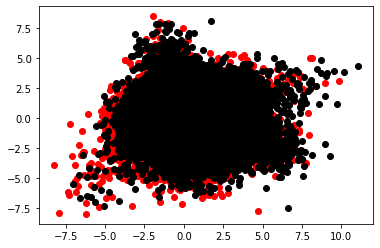

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_reduced = pca.fit_transform(X_train_scaled)
plt.scatter(X_train_reduced[y_train==0][:,0], X_train_reduced[y_train==0][:,1], color='red')
plt.scatter(X_train_reduced[y_train==1][:,0], X_train_reduced[y_train==1][:,1], color='black')

CPU times: user 6min 41s, sys: 10.5 s, total: 6min 51s
Wall time: 3min 37s


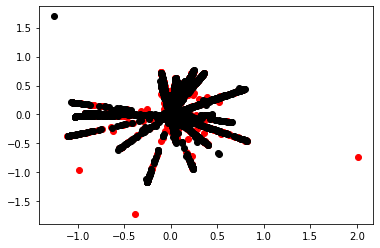

In [15]:
%%time
from sklearn.manifold import TSNE
from sklearn.utils import shuffle
tsne = TSNE(n_components=2, n_iter=250)
X_train_shuffled, y_train_shuffled = shuffle(X_train_scaled, y_train)
X_train_shuffled = X_train_shuffled[:int(0.05*len(X_train))]
y_train_shuffled = y_train_shuffled[:int(0.05*len(y_train))]
X_train_reduced = tsne.fit_transform(X_train_shuffled)
plt.scatter(X_train_reduced[y_train_shuffled==0][:,0], X_train_reduced[y_train_shuffled==0][:,1], color='red')
plt.scatter(X_train_reduced[y_train_shuffled==1][:,0], X_train_reduced[y_train_shuffled==1][:,1], color='black')